# Learning objective

This notebook show examples of linear dispersive wave phenomena, illustrating the concepts of phase velocity and group velocity through animations. All quantities in corresponding SI units (not written out).

# Preliminaries

In [ ]:
# interactive plots setup
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# sympy setup
import sympy as sp
sp.init_printing()
from sympy.vector import *

# ploting customizations
from matplotlib import pyplot as plt
size=16
params = {'legend.fontsize': 'large',
#          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.875,
          'ytick.labelsize': size*0.875,
          'axes.titlepad': 25}
plt.rcParams.update(params)
%matplotlib inline

# for animations
from matplotlib import animation, rc
from IPython.display import HTML

# numerics
import numpy as np

# to save plots as files and download them
#from google.colab import files

## Credit

Initial version written by [Ivan C. Christov](http://christov.tmnt-lab.org), Purdue University.

# Phase velocity

Consider the a sinusoidal oscillation in the form of a monochromatic wave (meaning sinlge $k$ value):
$$ u(x,t) = \cos\big(\omega(k)t - kx\big), $$
for some given dispersion relation $\omega(k)$, which defines the frequency of the wave in terms of the given wavenumber $k$.

Below, we show an interactive plot.

In [ ]:
# wave speed
c = 0.1
# lattice spacing
h = 0.5

In [ ]:
k = sp.symbols('k')
# I use a 'lambdified' SymPy function so I can also compute domega/dk automatically

# input your dispersion relation of choice, applies to both examples
#w = c*k
#w = c*k*sp.sqrt(1 - (h**2)*(k**2)/12)
w = c*(k + 0.1*k**2)
#w = 2*c/h*sp.sin(k*h/2)

# I use a 'lambdified' SymPy function so I can also compute domega/dk automatically
omega = sp.lambdify(k, w)
domegadk = sp.lambdify(k, w.diff(k))

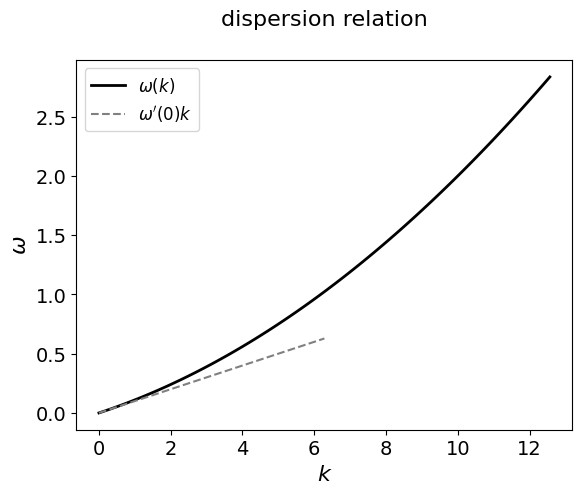

In [ ]:
# plot the dispersion relation chosen
kmax = 2*np.pi/h
krange = np.linspace(0, kmax, 100)

fig, ax = plt.subplots()
ax.plot(krange, omega(krange), color='black', linewidth=2, label='$\omega(k)$')

# for the dispersive cases only, when domegadk is not a constant,
# plot a dashed trendline of omega = c*k
if domegadk(1) != domegadk(2):
  ax.plot(krange/2, domegadk(0)*krange/2, color='gray', linestyle='dashed', label="$\omega'(0) k$")

ax.set_xlabel('$k$')
ax.set_ylabel('$\omega$')
ax.set_title('dispersion relation')
#ax.grid()
ax.legend()
plt.show()

In [ ]:
# define horizontal extent of plot and grid, applies to both examples
xmax = 10.0
x = np.linspace(0, xmax, 1000)

# pick two wavenumbers, applies to both examples
# I picked them commensurate (=2*pi*n/L) with the x-interval to look nicer
myk1 = 2*np.pi/xmax * 7;
myk2 = 2*np.pi/xmax * 2;

In [ ]:
# set up the figure and axis
fig, ax = plt.subplots()
ax.set_title('monochromatic waves')
ax.set_ylabel('$u(x,t)$')
ax.set_ylim(-1.05,1.05)
ax.set_xlabel('$x$')
ax.set_xlim(0,xmax)
# if you want to move horizontal axis label to top so it doesn't clash with animation controls
# but plt.tight_layout() also fixes this
#ax.xaxis.set_label_position('top')
#ax.xaxis.set_ticks_position('top')
plt.tight_layout()
plt.close()

# initialize plot objects with some dummy data (replaced in animation)
line1, = ax.plot(x, 0*x, color='blue', linewidth=2, label=fr'$k_1={myk1:.2f}...$')
line2, = ax.plot(x, 0*x, color='red', linewidth=2, label=fr'$k_2={myk2:.2f}...$')
ax.legend(loc="lower right")

# number of animation frames
numframes = 100
tmax = 1

# animation function called sequentially by `FuncAnimation' below
def animate(t):
  # the t passed is actually the frame counter, not time
  # so it should be rescaled to get actual time as % of the frames
  tstar = t/numframes * tmax

  uxt = np.cos(omega(myk1)*t - myk1*x)
  line1.set_data(x, uxt)
  uxt = np.cos(omega(myk2)*t - myk2*x)
  line2.set_data(x, uxt)

  return (line1, line2, )

anim = animation.FuncAnimation(fig, animate, frames=numframes, interval=100, blit=True)

# this is necessary to get the animation to work on Google's Colab
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

# Dispersion of a pulse

Now consider the following superposition:
$$
  u(x,t) = \mathrm{Re}\left[ \sum_j a_j e^{i \omega(k_j)t - i k_j x} \right], \qquad
  a_j = e^{-k_j^2/(4\pi)}
$$
for the same dispersion relation $\omega(k)$ defined above. We will take a couple dozen of equispaced values and see what $u(x,t)$ looks like.

This superposition happens to correspond to the Fourier series of the Gaussian $e^{-\pi x^2}$.

In [ ]:
def upulse(x,t):
  u = 0
  for j in range(1,101):
    kj = np.pi/xmax * j
    aj = np.exp(-kj**2/(4*np.pi))
    u = u + aj*np.exp(1j*omega(kj)*t - 1j*kj*x)
  return np.real(u)

In [ ]:
# set up the figure and axis
fig, ax = plt.subplots()
ax.set_title('evolution of a pulse')
ax.set_ylabel('$u(x,t)$')
ax.set_ylim(-4.5,10)
ax.set_xlabel('$x$')
ax.set_xlim(0,xmax)
# if you want to move horizontal axis label to top so it doesn't clash with animation controls
# but plt.tight_layout() also fixes this
#ax.xaxis.set_label_position('top')
#ax.xaxis.set_ticks_position('top')
plt.tight_layout()
plt.close()

# initialize plot objects with some dummy data (replaced in animation)
line, = ax.plot(x, upulse(x,0), color='blue', linewidth=2)

# number of animation frames
numframes = 200
tmax = 1

# animation function called sequentially by `FuncAnimation' below
def animate(t):
  uxt = upulse(x,t)
  line.set_data(x, uxt)

  return (line,)

anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
# this is necessary to get the animation to work on Google's Colab
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.

# Group velocity

Re-consider the earlier sinusoidal oscillation, now adding two of them with different wavenumbers $k_1-k_2=\Delta k\ne0$:
$$ u(x,t) = a_1 \cos\big(\omega(k_1)t - k_1 x\big) + a_2 \cos\big(\omega(k_2)t - k_2 x\big)$$
for the same dispersion relation $\omega(k)$ defined above.

Below, we show an interactive plot.

In [ ]:
# set up the figure and axis
fig, ax = plt.subplots()
ax.set_title('superposition of two \"close\" $k$ values')
ax.set_ylabel('$u(x,t)$')
ax.set_ylim(-1.05,1.05)
ax.set_xlabel('$x$')
ax.set_xlim(0,xmax)
# if you want to move horizontal axis label to top so it doesn't clash with animation controls
# but plt.tight_layout() also fixes this
#ax.xaxis.set_label_position('top')
#ax.xaxis.set_ticks_position('top')
plt.tight_layout()
plt.close()

# initialize plot objects with some dummy data (replaced in animation)
line1, = ax.plot(x, 0*x, color='blue', linewidth=2)
#line2, = ax.plot(x, 0*x, color='gray', linestyle='dashed')

# number of animation frames
numframes = 100
tmax = 1

# animation function called sequentially by `FuncAnimation' below
def animate(t):
  a1 = 0.5
  a2 = 0.4
  uxt = a1*np.cos(omega(myk1)*t - myk1*x) \
        + a2*np.cos(omega(myk2)*t - myk2*x)
  line1.set_data(x, uxt)
  #uxt2 = a1*(1 + a2*np.cos((myk1-myk2)*domegadk(myk1)*t - myk2*x))
  #line2.set_data(x, uxt2)

  return (line1, line2)

anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
# this is necessary to get the animation to work on Google's Colab
rc('animation', html='jshtml')
anim

Output hidden; open in https://colab.research.google.com to view.